In [1]:
# Imports
from agents.agent import SimplePolicyAgent 
from models.mlps import MLPBackbone
from models.cnns import CNNBackbone  # Not used here
import gymnasium as gym
import torch

# Enable autoreload for all modules
%load_ext autoreload
%autoreload 2

In [2]:

# Determine device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
# !pip install swig
# !pip install box2d
# !pip install gymnasium[box2d]

In [4]:
# Create the Gymnasium environment for LunarLander with rendering enabled
env = gym.make("LunarLander-v3", render_mode="human")

In [5]:
# Initialize the policy with MLP backbone
policy = SimplePolicyAgent(env=env, device=device, use_cnn=False, entropy_coef=0.00)
print(policy.model)

MLPBackbone(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)


In [ ]:
history = []

for i in range(300):
    results_dict = policy.run_episode(env, render=False)
    print(results_dict)
    history.append(results_dict)

libEGL warning: failed to open /dev/dri/renderD128: Permission denied

libEGL warning: failed to open /dev/dri/renderD128: Permission denied

libEGL warning: failed to open /dev/dri/card1: Permission denied

libEGL warning: failed to open /dev/dri/renderD129: Permission denied

libEGL warning: failed to open /dev/dri/renderD129: Permission denied

libEGL warning: failed to open /dev/dri/card2: Permission denied

libEGL warning: failed to open /dev/dri/renderD130: Permission denied

libEGL warning: failed to open /dev/dri/renderD130: Permission denied

libEGL warning: failed to open /dev/dri/card3: Permission denied

libEGL warning: failed to open /dev/dri/renderD131: Permission denied

libEGL warning: failed to open /dev/dri/renderD131: Permission denied

libEGL warning: failed to open /dev/dri/card4: Permission denied

libEGL warning: failed to open /dev/dri/renderD132: Permission denied

libEGL warning: failed to open /dev/dri/renderD132: Permission denied

libEGL warning: failed to 

{'total_return': -128.03105956635426, 'policy_loss': 0.38709044456481934, 'entropy_loss': -124.59356689453125, 'total_loss': 0.3746310770511627, 'steps': 90}
{'total_return': -165.08467448890266, 'policy_loss': -0.9754133224487305, 'entropy_loss': -95.48434448242188, 'total_loss': -0.984961748123169, 'steps': 69}
{'total_return': -258.04342456504304, 'policy_loss': 0.31893157958984375, 'entropy_loss': -181.27757263183594, 'total_loss': 0.3008038103580475, 'steps': 131}
{'total_return': -128.2613622128142, 'policy_loss': -0.24634361267089844, 'entropy_loss': -113.46125030517578, 'total_loss': -0.2576897442340851, 'steps': 82}
{'total_return': -53.11729572530746, 'policy_loss': -2.1339378356933594, 'entropy_loss': -150.37973022460938, 'total_loss': -2.1489758491516113, 'steps': 109}
{'total_return': -98.32271243603094, 'policy_loss': -0.6749210357666016, 'entropy_loss': -143.75796508789062, 'total_loss': -0.6892968416213989, 'steps': 104}
{'total_return': -284.3698223179635, 'policy_loss

   total_return  policy_loss  entropy_loss  total_loss
0   -348.150946     0.212927   -128.688477    0.200058
1   -103.214600     1.614103   -118.910538    1.602212
2    -93.895472    -0.175258   -100.910599   -0.185349
3    -87.692211     1.666035    -93.972847    1.656637
4   -335.063813     0.257241   -123.111664    0.244930
5   -107.484865    -0.446539   -163.015472   -0.462840
6   -271.465802     0.046354   -122.886284    0.034066
7   -177.711533    -0.704723   -165.826141   -0.721305
8    -83.974475     0.051882   -145.215424    0.037361
9   -114.415293    -1.439515   -159.071777   -1.455422


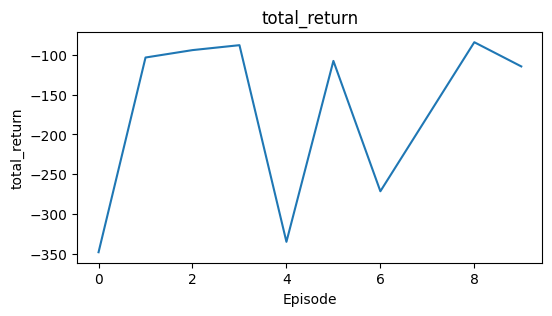

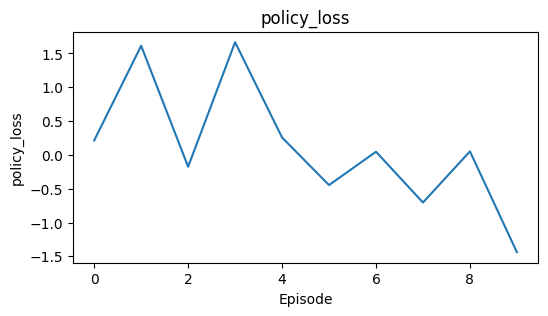

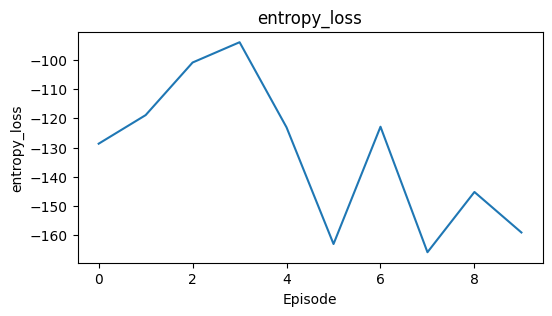

In [10]:
import matplotlib.pyplot as plt

# convert every history dict to a dataframe
import pandas as pd
df = pd.DataFrame(history)
print(df)
# {'total_return': -10.0, 'policy_loss': -7.564835071563721, 'entropy_loss': -160.30296325683594, 'total_loss': -7.580865383148193}

# make a function to plot the history
def plot_from_history(df, title, size=(6, 3)):
    plt.figure(figsize=size)
    plt.plot(df[title])
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel(title)
    plt.show()

plot_from_history(df, 'total_return')
plot_from_history(df, 'policy_loss')
plot_from_history(df, 'entropy_loss')


